In [203]:
# Importing libraries

import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import mannwhitneyu


In [204]:
# Importing the first table of data (vehicles)
# Please make sure to change the path according to the file placement

path = "/Users/mehdi/Downloads/Data Science Case Study/"
vehicles = pd.read_csv(path + "vehicles.csv")
vehicles.head()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description
0,1,1,67.85,59,5,0,7
1,2,0,100.70,53,5,0,224
2,3,0,74.00,74,4,1,21
3,4,0,135.00,75,1,0,184
4,5,0,59.36,53,2,1,31


In [205]:
# General information about the dataframe

vehicles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   vehicle_id         1000 non-null   int64  
 1   technology         1000 non-null   int64  
 2   actual_price       1000 non-null   float64
 3   recommended_price  1000 non-null   int64  
 4   num_images         1000 non-null   int64  
 5   street_parked      1000 non-null   int64  
 6   description        1000 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 54.8 KB


# Descriptif analysis

In [206]:
# Statisticals information about the numerical features

vehicles[["actual_price", "recommended_price", "num_images", "description"]].describe()

,actual_price,recommended_price,num_images,description
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,87.940730,62.206000,3.008000,90.792000
std,29.724589,16.082544,1.348983,76.948644
min,32.760000,35.000000,1.000000,1.000000
25%,64.942500,49.000000,2.000000,25.000000
50%,83.930000,62.000000,3.000000,57.500000
75%,107.010000,76.000000,4.000000,158.000000
max,174.440000,90.000000,5.000000,250.000000


#### Univariable analysis

In this first stage of the analysis we will start by analyzing each variable in an independant way to have a first idea about the distributions. 

In [207]:
# The percentage of the vehicules with technologie installed

vehicles["technology"].value_counts()*100/vehicles.shape[0]

0    83.0
1    17.0
Name: technology, dtype: float64

Text(0.5, 1.0, 'The distribution of the actual price over the 1000 vehicles')

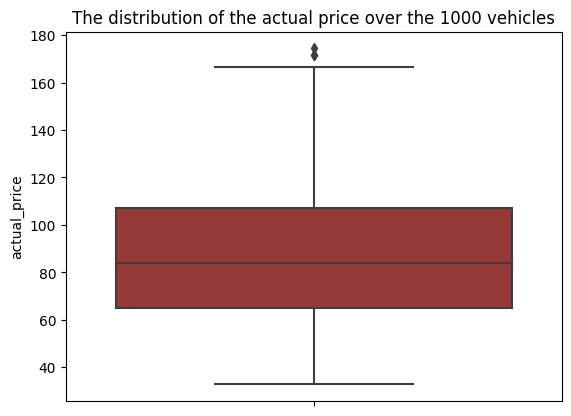

In [208]:
# The distribution of the actual price over the 1000 vehicles

sn.boxplot(y = "actual_price", data = vehicles, color = "brown")
plt.title("The distribution of the actual price over the 1000 vehicles")

According to the box plot and the statistical table above :  

- The median price is 84\$
- 25\% of the vehicles are priced between 32\\$ and 64\$   
- 50\% of the vehicles are priced between 64\\$ and 107\$  
- The rest is priced between 107\\$ and 174\$  
- The lenght of the upper quartile of the box is big compared to the other quartiles, indicating that the upper quartile of the data is spread out over a wider range of price.



Text(0.5, 1.0, 'The distribution of the recommended price over the 1000 vehicles')

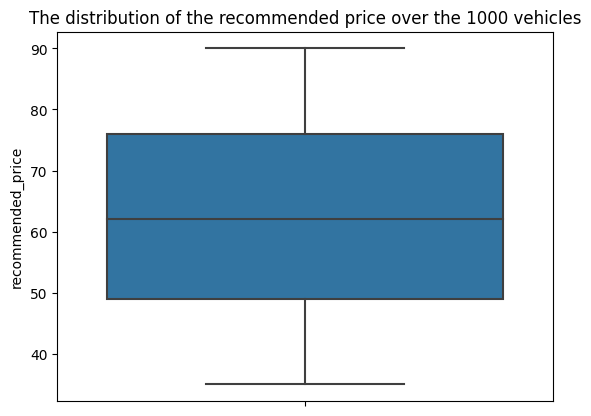

In [209]:
# The distribution of the recommended price over the 1000 vehicles

sn.boxplot(y = "recommended_price", data = vehicles)
plt.title("The distribution of the recommended price over the 1000 vehicles")

According to the box plot and the statistical table above :  

- The median recommended price is 62\$
- 25\% of the vehicles are priced between 35\\$ and 49\$   
- 50\% of the vehicles are priced between 49\\$ and 76\$  
- The rest is priced between 76\\$ and 90\$  

Text(0.5, 1.0, 'The distribution of the number of images over the 1000 vehicles')

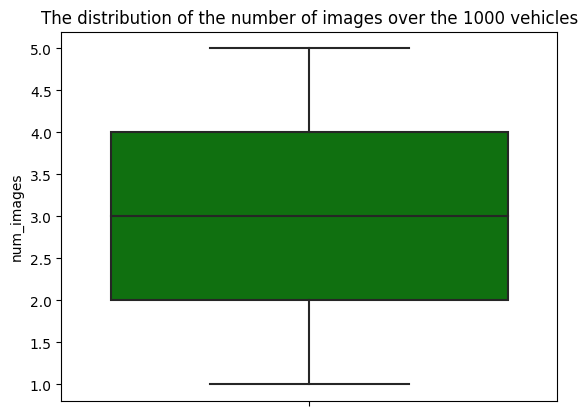

In [210]:
# The distribution of the number of images over the 1000 vehicles

sn.boxplot(y = "num_images", data = vehicles, color = "green")
plt.title("The distribution of the number of images over the 1000 vehicles")

According to the box plot above : 

- The median number of images per car is 3 images
- 25\% of the cars have between 1 and 2 images   
- 50\% of the cars have between 2 and 4 images   
- The rest have between 4 and 5 images


Text(0.5, 1.0, 'The distribution of the lenght of the description over the 1000 vehicles')

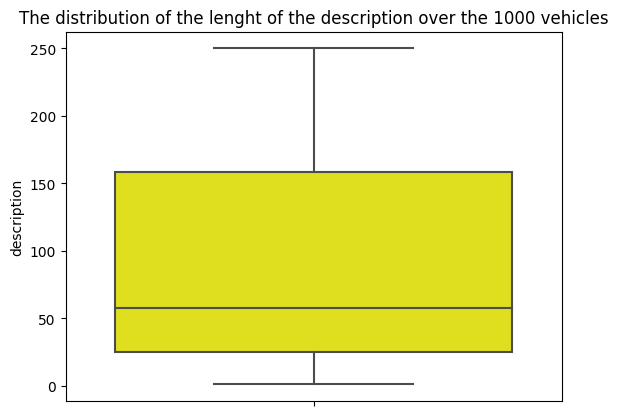

In [211]:
# The distribution of the lenght of the description over the 1000 vehicles

sn.boxplot(y = "description", data = vehicles, color = "yellow")
plt.title("The distribution of the lenght of the description over the 1000 vehicles")

According to the box plot above : 

- The median number of characters of the car description inputted by the owner is 57 characters
- 25\% of the descriptions have between 1 and 25 characters   
- 50\% of the descriptions have between 25 and 158 characters   
- The rest of the descriptions have between 158 and 258 characters
- The upper half of the box is considerably bigger than the lower half, which indicates that 50% of the 
descriptions are spread out over a wider range of characters numbers.


In [212]:
# The percentage of street parked vehicles

vehicles["street_parked"].value_counts()*100/vehicles.shape[0]

1    51.1
0    48.9
Name: street_parked, dtype: float64

Let's import the secound table to start the bivariable analysis

In [213]:
# Importing the secound table of the data (reservations)
# Please make sure to change the path according to the file placement

path = "/Users/mehdi/Downloads/Data Science Case Study/"

reservations = pd.read_csv(path + "reservations.csv")
reservations

,vehicle_id,reservation_type
0,208,1
1,601,3
2,993,1
3,423,2
4,685,3
...,...,...
6371,812,3
6372,687,3
6373,812,3
6374,687,2


In [214]:
# Replacing the reservation type number with its signification
reservations["reservation_type"] = reservations["reservation_type"].replace({1:"hourly_rental",
                                                                             2:"daily_rental",3:"weekly_rental"})

# Aggregating the table to have the number of reservation for each vehicle and each reservation type
df = reservations.groupby(["vehicle_id","reservation_type"]).size().reset_index(name = 'count')

# Pivoting the table to have a better look on information inside
df = df.pivot_table(columns = "reservation_type", index = "vehicle_id", values = "count").reset_index()

# Filling the null values which represents no reservation with 0
df = df.fillna(0)
df = df.rename_axis(None, axis=1)

df['daily_rental'] = df['daily_rental'].astype(int)
df['hourly_rental'] = df['hourly_rental'].astype(int)
df['weekly_rental'] = df['weekly_rental'].astype(int)

df

,vehicle_id,daily_rental,hourly_rental,weekly_rental
0,1,0,1,0
1,2,3,4,0
2,3,9,1,7
3,4,0,1,1
4,5,1,0,1
...,...,...,...,...
906,996,10,4,5
907,997,1,5,3
908,998,2,3,1
909,999,1,1,7


In [215]:
# Statistical informations
df[['daily_rental', 'hourly_rental', 'weekly_rental']].describe()

,daily_rental,hourly_rental,weekly_rental
count,911.000000,911.000000,911.000000
mean,2.257958,2.567508,2.173436
std,1.913049,2.244309,1.830930
min,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,3.000000,4.000000,3.000000
max,12.000000,14.000000,12.000000


**NB :** We notice that 90 vehicles are missing on this table, and it's mainly because they don't have any reservation. But it's interesting to include them to try to undertand why those vehiles doesn't have reservations

In [216]:
# Let's add the missing vehicles 

missing_vehicle_ids = []

for i in range(1,vehicles.shape[0]+1):
    if i not in list(df["vehicle_id"]):
        missing_vehicle_ids.append(i)

df = pd.concat([df,pd.DataFrame({"vehicle_id":missing_vehicle_ids,
                                 "daily_rental":[0 for i in range(len(missing_vehicle_ids))],
                                 "hourly_rental":[0 for i in range(len(missing_vehicle_ids))],
                                 "weekly_rental":[0 for i in range(len(missing_vehicle_ids))]})], 
               axis = 0, ignore_index = True)
        
df

,vehicle_id,daily_rental,hourly_rental,weekly_rental
0,1,0,1,0
1,2,3,4,0
2,3,9,1,7
3,4,0,1,1
4,5,1,0,1
...,...,...,...,...
995,969,0,0,0
996,972,0,0,0
997,973,0,0,0
998,974,0,0,0


In [217]:
# Merging the 2 tables 

df_final = pd.merge(vehicles, df, on = ["vehicle_id"])
df_final["Total_reservation"] = df_final["daily_rental"] + df_final["hourly_rental"] + df_final["weekly_rental"]
df_final.head()


,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,daily_rental,hourly_rental,weekly_rental,Total_reservation
0,1,1,67.85,59,5,0,7,0,1,0,1
1,2,0,100.70,53,5,0,224,3,4,0,7
2,3,0,74.00,74,4,1,21,9,1,7,17
3,4,0,135.00,75,1,0,184,0,1,1,2
4,5,0,59.36,53,2,1,31,1,0,1,2


The difference between the recommanded price and the actual price can be also affecting the total reservation, if an annouce has a high price compared to the recommanded one the car can be overvalued and then less reservations.  
Let's analyze this more deeper in the next steps

In [218]:
df_final["price margin"] = df_final["actual_price"] - df_final["recommended_price"]
df_final.head()

,vehicle_id,technology,actual_price,recommended_price,num_images,street_parked,description,daily_rental,hourly_rental,weekly_rental,Total_reservation,price margin
0,1,1,67.85,59,5,0,7,0,1,0,1,8.85
1,2,0,100.70,53,5,0,224,3,4,0,7,47.70
2,3,0,74.00,74,4,1,21,9,1,7,17,0.00
3,4,0,135.00,75,1,0,184,0,1,1,2,60.00
4,5,0,59.36,53,2,1,31,1,0,1,2,6.36


**Nb :**   The objectif of this analysis is to analyze the features that are impacting the total reservations so we will focus only on the total reservations



In [219]:
# The correlation is a good way to analyze the linearity between 2 numerical variables, so let's calculate that

df_final[['actual_price', 'recommended_price','num_images', 'description', "price margin"]].corrwith(df_final["Total_reservation"])


actual_price        -0.258907
recommended_price   -0.012758
num_images           0.219804
description          0.016303
price margin        -0.367182
dtype: float64

**Results :**  
  
- Very low correlation near to 0 between the recommanded price and the Total reservations and between the description and the total reservations. Which means that those variables are not correlated.  

- The highest correlation is between the price margin and the total reservations. -36% is not a high correlation but a moderate one, we can say that there is a linear relation between the 2 variables but not a strong one (we will test the significativity of this relation after that). It's also a negative correlations so the variables have opposit directions (the highest the price the lowest the number of reservations).  

- The other correlations "actual price" vs "Total reservations" and "num_images" vs "Total reservations" are weak negative correlation so the linear relationship between those variables is weak.

In [220]:
# The pearson correlation test

variables = ['actual_price', 'recommended_price', 'num_images', 'description', 'price margin']
p_values = []
for i in range(1,6):
    p_values.append(pearsonr(list(df_final[variables[i-1]]), list(df_final["Total_reservation"]))[1])
    print(f"Valeur p - {variables[i-1]}:",p_values[i-1])




Valeur p - actual_price: 8.842701661943992e-17
Valeur p - recommended_price: 0.6869793430751393
Valeur p - num_images: 2.0915107731610384e-12
Valeur p - description: 0.6066078891025712
Valeur p - price margin: 2.8185469343529066e-33


**Results :**    
  
We can conclude that the correlation "actual_price" - "Total_reservation", "num_images" - "Total_reservation" and "price margin" - "Total_reservation" are statistically significant (p-value < 0.05) and the chance of having those correlations by pure chance are very low.     

In the other hand the correlations "description" - "Total_reservation" and "recommended_price" - "Total_reservation" are not significant and they can easily be produced randomly

In [221]:
# Let's move now to the categorical variables

# We will compute the mean of total reservation by category (having the technology or not)
df_final.groupby(["technology"])["Total_reservation"].agg(sum)/df_final["technology"].value_counts()

technology
0    6.075904
1    7.841176
dtype: float64

Text(0.5, 1.0, 'The distribution of total reservations by category of technology')

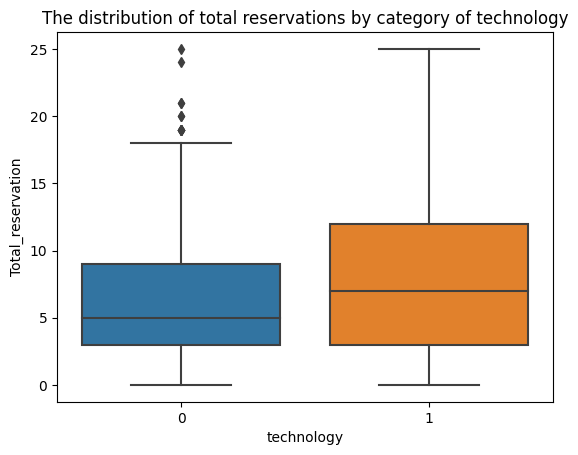

In [223]:
# The distribution of total reservations by category of technology

sn.boxplot(y = "Total_reservation", data = df_final, x = "technology")
plt.title("The distribution of total reservations by category of technology")

We can notice in the boxes above that the cars having the technology have more reservations than the cars without technology. The median of the orange box is hier than the blue one and the distribution is wider and cover a bigger range of total reservations.  
  
Let's do a statistical test to analyze the relation between the 2 variables. One of the test that we can use is the U test of Mann-Whitney. This test is used between a numerical variable and a binary one to see if there is a diffenrence between the distrubutions of the numerical variable according to the binary variable.


In [197]:
# Seperate the groups according to the technology
g1 = df_final.loc[df_final["technology"]==1]["Total_reservation"]
g2 = df_final.loc[df_final["technology"]==0]["Total_reservation"]

# The statistical test of Mann-Whitney
u_statistic, p_value = mannwhitneyu(g1, g2)

# printing the results
print("The statistical test of Mann-Whitney :", u_statistic)
print("P value :", p_value)

The statistical test of Mann-Whitney : 81896.5
P value : 0.0009135294338014848


**Results :** 
    
The p-value is lower than 0.05 so there is a significant difference between the 2 distributions and the fact that a car is having the technology is affecting the number of reservations

In [198]:
# We will compute the mean of total reservations by category (parking_street or not)

df_final.groupby(["street_parked"])["Total_reservation"].agg(sum)/df_final["street_parked"].value_counts()

0    6.458078
1    6.297456
dtype: float64

Text(0.5, 1.0, 'The distribution of total reservations by category of parking street')

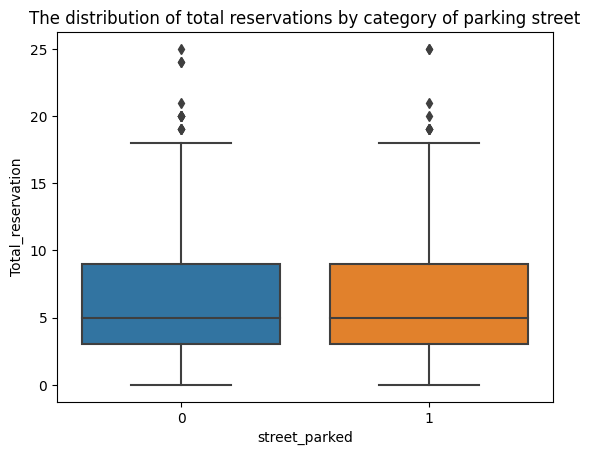

In [224]:
# The distribution of total reservations by category of parking street

sn.boxplot(y = "Total_reservation", data = df_final, x = "street_parked")
plt.title("The distribution of total reservations by category of parking street")

**Results :**  
 
We can't notice any difference between the 2 distributions, they seem identical with some small difference in their outliers, so we can have a first idea about the dependance between the variables but let's test that

In [202]:
# Seperate the groups according to the technology

gg1 = df_final.loc[df_final["street_parked"]==1]["Total_reservation"]
gg2 = df_final.loc[df_final["street_parked"]==0]["Total_reservation"]

# The statistical test of Mann-Whitney
u_statistic, p_value = mannwhitneyu(gg1, gg2)

# Print the results
print("Statistique du test U de Mann-Whitney :", u_statistic)
print("Valeur p :", p_value)


Statistique du test U de Mann-Whitney : 123195.5
Valeur p : 0.7017990879317433


**Results :**. 
      
We can see that the p-value is higher than 0.05 so there is no significant difference between the 2 distributions

## summary

As a result of this analysis, we can consider that the factors that seems to be most important in driving the total reservations are the price margin and the technology. The actual price and the number of images come in a second slot with a weaker correlation.  

We can conclude also that the cars with the technology have more reservations than the cars without and even the statistical test shows that there is a difference between the 2 distributions and having the technolgy is affecting the total reservations.  

In this analysis we focused only on the total reservations but we could also go deeper by analysing the impact on each type of reservations (hourly, daily or weekly). 

We can also create a machine learning model to predict the total reservations if we had more data and analyze wihch factor is driving the prediction more